## Plotting the figures from the article

### Imports 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from analysis import calcPowerSpectrum
from plot_utility import plot_MEG_summary,plot_PSD_summary

### Load data (averaged over all trials)

In [2]:
ctrl_avg_meg_20_A_0 = np.load('../data/Data-Average/sims_ctrl_avg_20Hz_A0.0.npy')
schiz_avg_meg_40_A_0 = np.load('../data/Data-Average/sims_schiz_avg_40Hz_A0.0.npy')

ctrl_avg_meg_20_A_0_25 = np.load('../data/Data-Average/sims_ctrl_avg_20Hz_A0.25.npy')
schiz_avg_meg_40_A_0_25 = np.load('../data/Data-Average/sims_schiz_avg_40Hz_A0.25.npy')

ctrl_avg_meg_20_A_0_375 = np.load('../data/Data-Average/sims_ctrl_avg_20Hz_A0.375.npy')
schiz_avg_meg_40_A_0_375 = np.load('../data/Data-Average/sims_schiz_avg_40Hz_A0.375.npy')

### Additional parameters

In [3]:
sim_time = 500
s = 2**13
dt = float(sim_time)/float(s)
time = np.linspace(0,sim_time,int(sim_time/dt))

#### Flags

In [4]:
savefig = 0 # set savefig to 1 if you want to store the figures
showfig = 1 # set plotfi to 1 if you want to show the figures

### Produce Figure 7

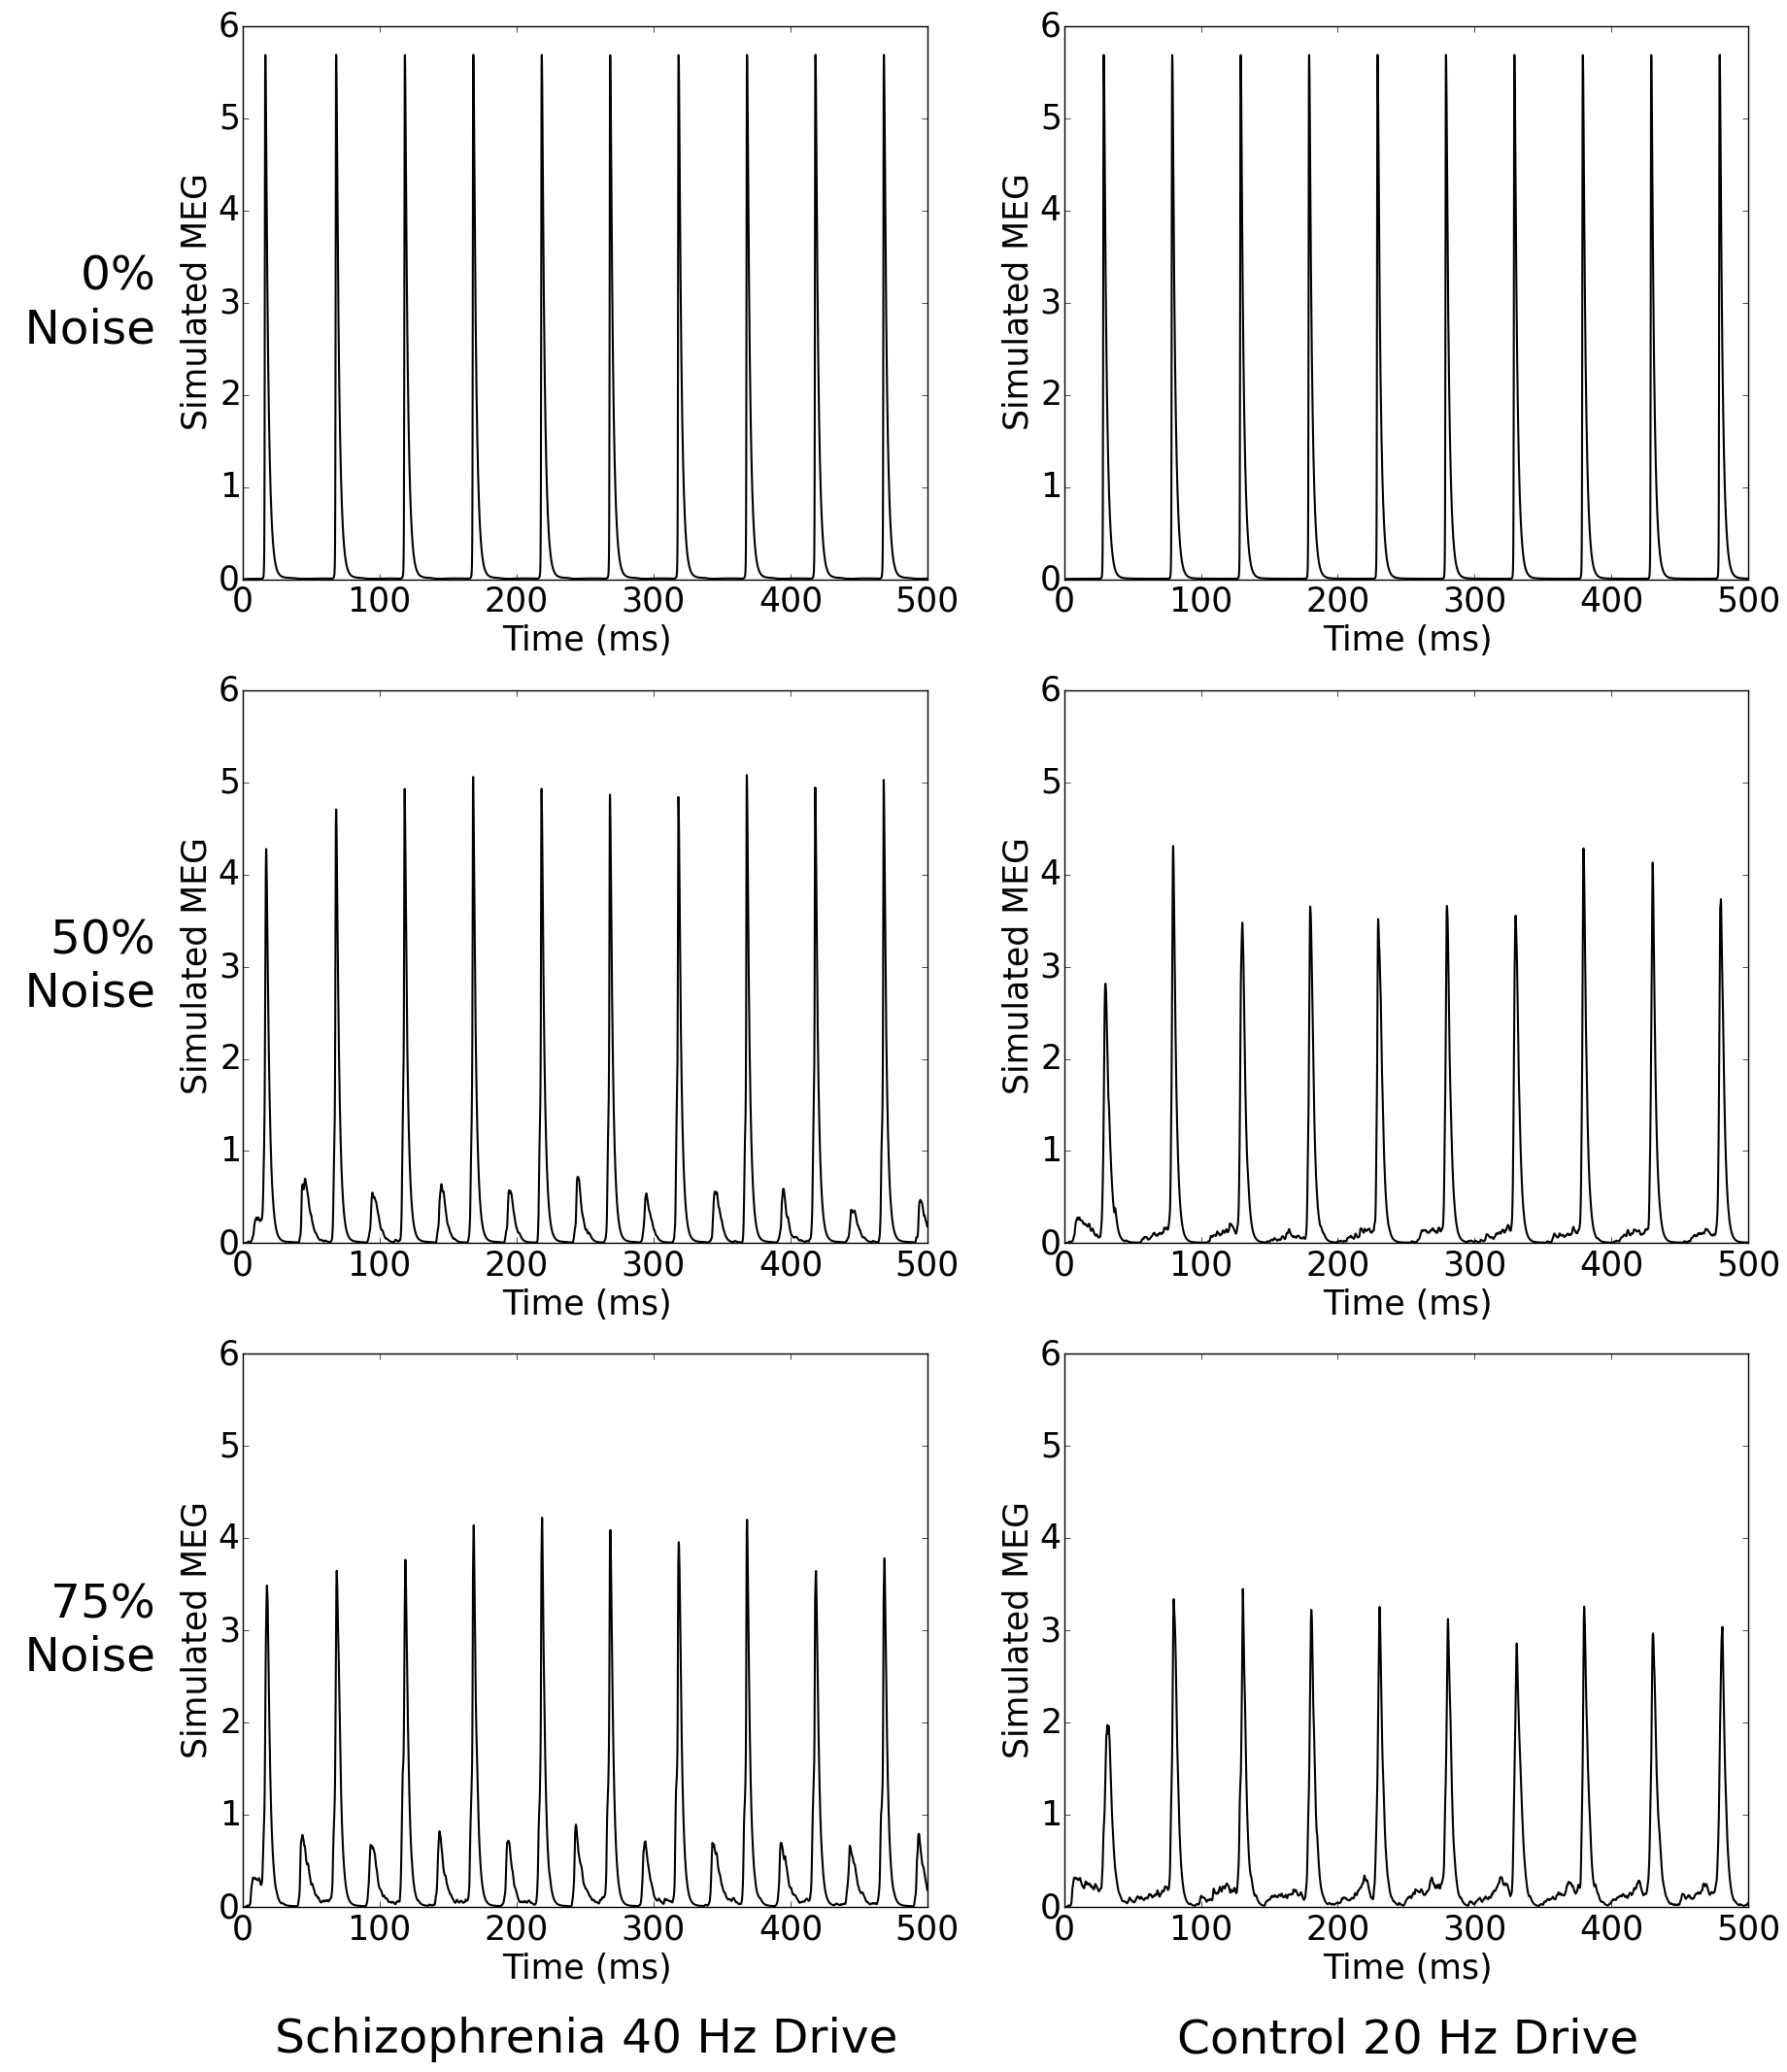

In [5]:
data_meg = [schiz_avg_meg_40_A_0,ctrl_avg_meg_20_A_0,schiz_avg_meg_40_A_0_25,ctrl_avg_meg_20_A_0_25,schiz_avg_meg_40_A_0_375,ctrl_avg_meg_20_A_0_375] 
xlabel = 'Time (ms)'
ylabel = 'Simulated MEG'
annotations = ['0% \n Noise','50% \n Noise','75% \n Noise','Schizophrenia 40 Hz Drive','Control 20 Hz Drive']
plot_MEG_summary(time,data_meg,xlabel,ylabel,annotations,savefig,'../data/Figures/Noise-Exploration-MEG',[25,35,25])

### Produce Figure 8

#### Calculate power spectra

In [6]:
pxx_ctrl_20_A_0,freqs = calcPowerSpectrum(ctrl_avg_meg_20_A_0,dt,sim_time)
pxx_schiz_40_A_0,_     = calcPowerSpectrum(schiz_avg_meg_40_A_0,dt,sim_time)

pxx_ctrl_20_A_0_25,freqs = calcPowerSpectrum(ctrl_avg_meg_20_A_0_25,dt,sim_time)
pxx_schiz_40_A_0_25,_     = calcPowerSpectrum(schiz_avg_meg_40_A_0_25,dt,sim_time)

pxx_ctrl_20_A_0_375,freqs = calcPowerSpectrum(ctrl_avg_meg_20_A_0_375,dt,sim_time)
pxx_schiz_40_A_0_375,_     = calcPowerSpectrum(schiz_avg_meg_40_A_0_375,dt,sim_time)

#### Plot figure

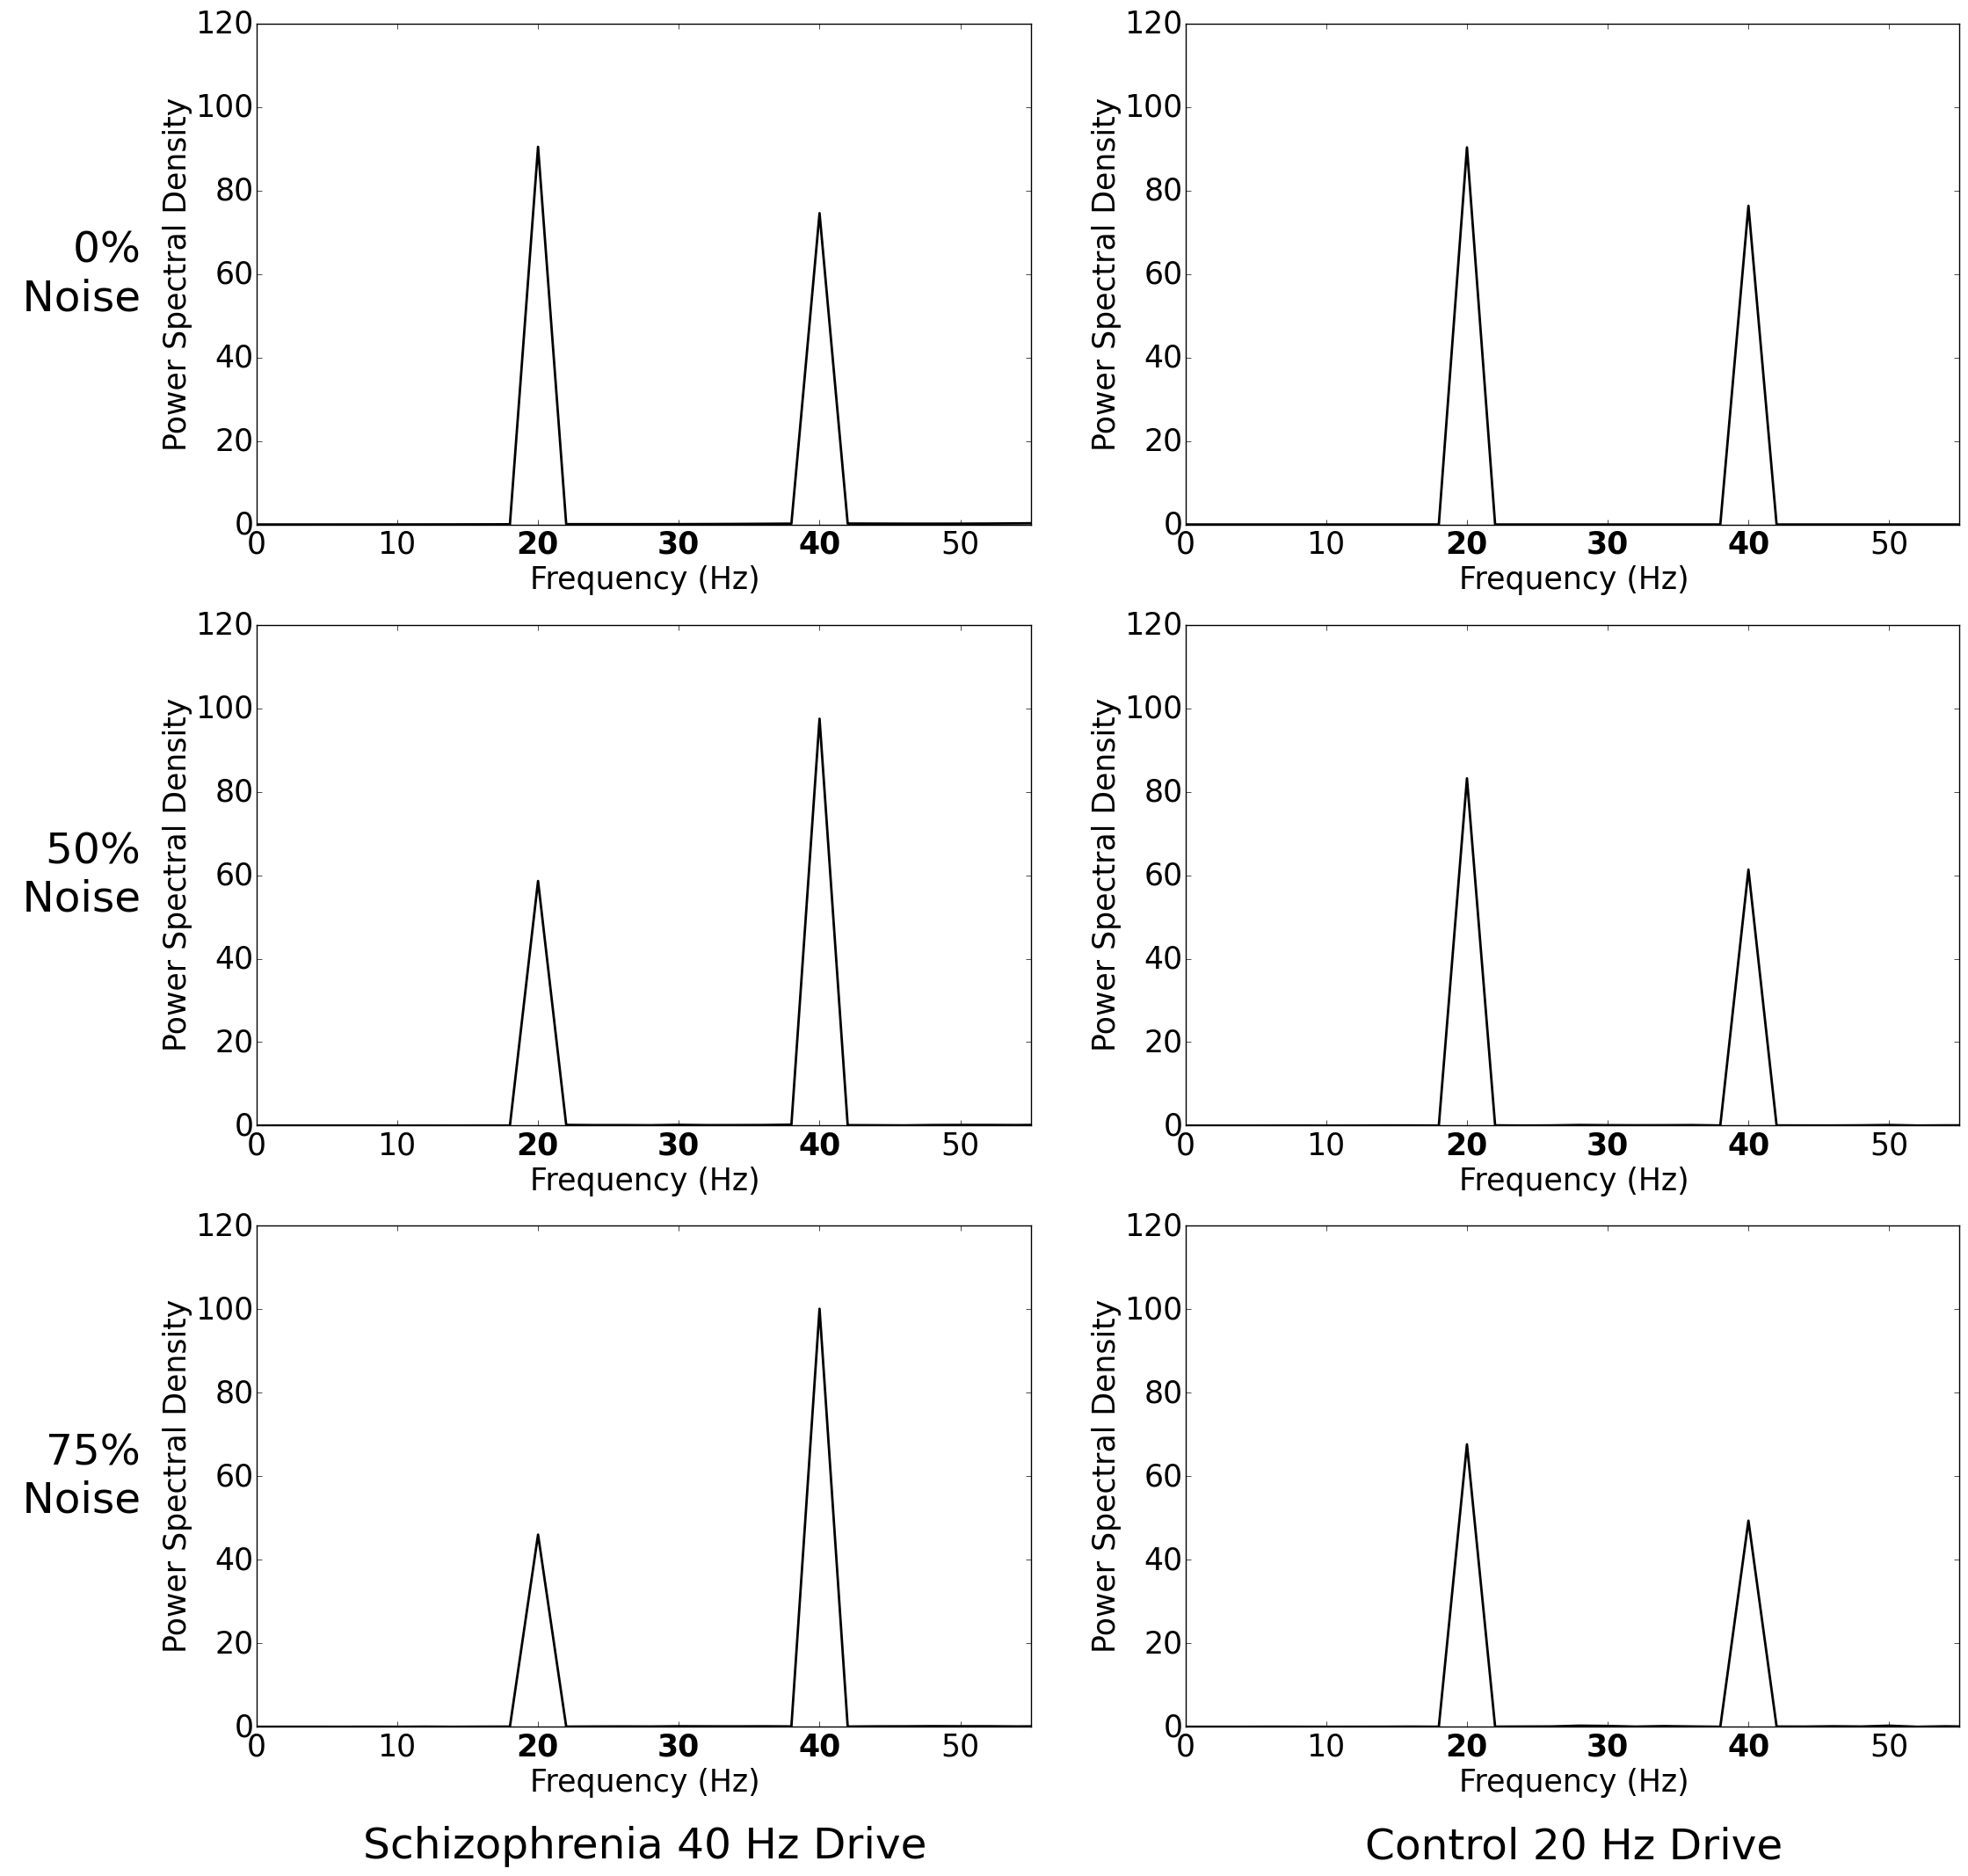

In [7]:
data_psd = [pxx_schiz_40_A_0,pxx_ctrl_20_A_0,pxx_schiz_40_A_0_25,pxx_ctrl_20_A_0_25,pxx_schiz_40_A_0_375,pxx_ctrl_20_A_0_375] 
xlabel = 'Frequency (Hz)'
ylabel = 'Power Spectral Density'
annotations = ['0% \n Noise','50% \n Noise','75% \n Noise','Schizophrenia 40 Hz Drive','Control 20 Hz Drive']
plot_PSD_summary(freqs*1000,data_psd,xlabel,ylabel,annotations,savefig,'../data/Figures/Noise-Exploration-PSD',[25,35,25])